<a href="https://colab.research.google.com/github/fidslk/FDA_test/blob/main/CIMA_FDA_Session_June_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the required Python Packages (Libraries/Modules)

In [ ]:
# Since fuzzywuzzy, python-Levenshtein libraries is not installed in google colab virtual machines, we have to install those by using following terminal command
!pip install fuzzywuzzy python-Levenshtein

In [6]:
import pandas as pd               # pandas library is used for data cleaning and analysis
import numpy as np                # numpy library is used to perform a wide variety of mathematical operations on arrays
from pandas import ExcelWriter    # import creating excel file functionaly (ExcelWriter class) from the pandas library/module
import datetime                   # datetime library is used for manipulating dates and times,eg- recognising date from a text

from copy import deepcopy         # Helps to create copyies of objects
import glob                       # Helps to return all file paths that match a specific pattern
import os                         # creating and removing a folder, fetching its contents, changing and identifying the current directory                   

import re                         # Helps in data manupulation, it used to identify whether a pattern exists in a given sequence of characters (string) or not and also to locate the position of the pattern in a corpus of text.
from fuzzywuzzy import fuzz       # Helps to Approximate String Matching, uses Levenshtein Distance to calculate the differences between sequences and patterns
from fuzzywuzzy import process

In [2]:
# Run this cell to mount your Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [144]:
pd.set_option("display.max_columns", None) # Set the pandas option to show all columns of a dataframe without truncating (default is 20 columns)
pd.options.display.float_format = '{:,.2f}'.format # Set the pandas option to show all floats/ amounts with two decimals

### Read files / Load required data into python analysis platform

---



In [139]:
PR_Data = pd.read_excel(r'/content/drive/My Drive/GoogleColabFolder/CIMA_Training/Case_one_Dataset.xlsx', sheet_name = 'PR_data', skiprows=0 , dtype={"Approved Date":'str'}) #,dtype={ "Vendor":'str'}

In [29]:
PR_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Request No              1689 non-null   object 
 1   SeqNo                   1689 non-null   int64  
 2   Project Code            1689 non-null   object 
 3   Project Desc            1689 non-null   object 
 4   PO No                   1689 non-null   int64  
 5   PO Status               1688 non-null   object 
 6   Budgeted Cost Center    1689 non-null   int64  
 7   Settlement Cost Center  1689 non-null   int64  
 8   GL Code                 1689 non-null   int64  
 9   Settlement GL Code      1689 non-null   int64  
 10  Start Month             1689 non-null   int64  
 11  End Month               1689 non-null   int64  
 12  ETADate                 28 non-null     object 
 13  Material                505 non-null    object 
 14  Description             1689 non-null   

In [30]:
PR_Data["Approved Date"]

0       2020-04-01 21:19:46
1       2020-04-01 21:19:46
2       2020-04-01 21:19:46
3       2020-04-01 21:19:46
4       2020-04-07 12:00:37
               ...         
1684    2021-03-11 15:40:22
1685    2021-03-11 15:40:22
1686    2021-03-11 15:40:22
1687    2021-03-11 15:40:22
1688    2021-03-11 15:40:22
Name: Approved Date, Length: 1689, dtype: object

In [16]:
PO_Data = pd.read_excel(r'/content/drive/My Drive/GoogleColabFolder/CIMA_Training/Case_one_Dataset.xlsx', sheet_name = 'PO_Data', skiprows=0 ,dtype={ "Document Date":'str'}) #,dtype={ "Vendor":'str'}

In [17]:
GR_Data = pd.read_excel(r'/content/drive/My Drive/GoogleColabFolder/CIMA_Training/Case_one_Dataset.xlsx', sheet_name = 'GR_Data', skiprows=0 ) #,dtype={ "Vendor":'str'}

In [76]:
Invoice_data = pd.read_excel(r'/content/drive/My Drive/GoogleColabFolder/CIMA_Training/Case_one_Dataset.xlsx', sheet_name = 'Invoice_data', skiprows=1 ) #,dtype={ "Vendor":'str'}

In [77]:
Payment_Data = pd.read_excel(r'/content/drive/My Drive/GoogleColabFolder/CIMA_Training/Case_one_Dataset.xlsx', sheet_name = 'Payment_Data', skiprows=1 ) #,dtype={ "Vendor":'str'}

In [114]:
Supplier_master = pd.read_excel(r'/content/drive/My Drive/GoogleColabFolder/CIMA_Training/Case_one_Dataset.xlsx', sheet_name = 'Supplier_master', skiprows=0 ) #,dtype={ "Vendor":'str'}

In [128]:
Employee_Master = pd.read_excel(r'/content/drive/My Drive/GoogleColabFolder/CIMA_Training/Case_one_Dataset.xlsx', sheet_name = 'Employee_Master', skiprows=0 ) #,dtype={ "Vendor":'str'}

In [22]:
Vendor_Evalution = pd.read_excel(r'/content/drive/My Drive/GoogleColabFolder/CIMA_Training/Case_one_Dataset.xlsx', sheet_name = 'Vendor_Evalution', skiprows=0 ) #,dtype={ "Vendor":'str'}

In [24]:
TW_Holidays = pd.read_excel(r'/content/drive/My Drive/GoogleColabFolder/CIMA_Training/Case_one_Dataset.xlsx', sheet_name = 'TW_Holidays', skiprows=0 ) #,dtype={ "Vendor":'str'}

In [44]:
PO_Data.head()

,PO_Ref,FMC_PO_Ref,Purchasing Document,Item,Document Date,Vendor/supplying plant,Material,Short Text,Material Group,Deletion Indicator,Item Category,Acct Assignment Cat.,Plant,Storage Location,Order Quantity,Order Unit,Quantity in SKU,Stockkeeping unit,Net price,Currency,Request No,Project Code,Unnamed: 20
0,PO_Ref_00001,FMC_PO_Ref_00001,250083689,10,2020-04-01 00:00:00,11515 TU VAN DAU TU NGAY MOI,NaN,License:Extend 1 YearWarranty(11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
1,PO_Ref_00002,FMC_PO_Ref_00002,250083689,20,2020-04-01 00:00:00,11515 TU VAN DAU TU NGAY MOI,NaN,License: Film4K Promotion (11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
2,PO_Ref_00003,FMC_PO_Ref_00003,250083689,30,2020-04-01 00:00:00,11515 TU VAN DAU TU NGAY MOI,NaN,License: 6Months Clip TV Free(11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
3,PO_Ref_00004,FMC_PO_Ref_00004,250083689,40,2020-04-01 00:00:00,11515 TU VAN DAU TU NGAY MOI,NaN,License: 6or 12 Months CAP ON(11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
4,PO_Ref_00005,FMC_PO_Ref_00005,250083703,10,2020-04-07 00:00:00,11515 TU VAN DAU TU NGAY MOI,NaN,License:Peak Design Promotion(20/4-31/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040004,ANPTW5020030034,NaN


### Adding a unique reference column to each dataframe

In [39]:
# Add a unique reference to each row in table in the form of alpa numaric
PR_Data['PR_Ref'] = [f'PR_Ref_{i:05d}' for i in range(1, PR_Data.shape[0] + 1)]
PR_Data.insert(0, 'PR_Ref', PR_Data.pop('PR_Ref'))
PR_Data.head()

,PR_Ref,PO_Ref,FMC_PO_Ref,Request No,SeqNo,Project Code,Project Desc,PO No,PO Status,Budgeted Cost Center,Settlement Cost Center,GL Code,Settlement GL Code,Start Month,End Month,ETADate,Material,Description,Qty,Unit Amount,Total Amount,Currency Code,Local Currency Amount,Requester,Approved Date
0,PR_Ref_00001,PO_Ref_00001,FMC_PO_Ref_00001,ANP-ABC-ST2-20040002,0,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689,PO Issued,501730,501730,872400,872400,202004,202004,NaN,NaN,License:Extend 1 YearWarranty(11/4-10/5),1.0,"TWD 7,200.00",7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46
1,PR_Ref_00002,PO_Ref_00002,FMC_PO_Ref_00002,ANP-ABC-ST2-20040002,1,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689,PO Issued,501730,501730,872400,872400,202004,202004,NaN,NaN,License: Film4K Promotion (11/4-10/5),1.0,"TWD 7,200.00",7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46
2,PR_Ref_00003,PO_Ref_00003,FMC_PO_Ref_00003,ANP-ABC-ST2-20040002,2,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689,PO Issued,501730,501730,872400,872400,202004,202004,NaN,NaN,License: 6Months Clip TV Free(11/4-10/5),1.0,"TWD 7,200.00",7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46
3,PR_Ref_00004,PO_Ref_00004,FMC_PO_Ref_00004,ANP-ABC-ST2-20040002,3,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689,PO Issued,501730,501730,872400,872400,202004,202004,NaN,NaN,License: 6or 12 Months CAP ON(11/4-10/5),1.0,"TWD 7,200.00",7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46
4,PR_Ref_00005,PO_Ref_00005,FMC_PO_Ref_00005,ANP-ABC-ST2-20040004,0,ANPTW5020030034,Budget for FY20 1Q Promotion License,250083703,PO Issued,501730,501730,872400,872400,202004,202004,NaN,NaN,License:Peak Design Promotion(20/4-31/5),1.0,"TWD 7,200.00",7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-07 12:00:37


In [40]:
# PO_Data
PO_Data['PO_Ref'] = [f'PO_Ref_{i:05d}' for i in range(1, PO_Data.shape[0] + 1)]
PO_Data.insert(0, 'PO_Ref', PO_Data.pop('PO_Ref'))
PO_Data.head()

,PO_Ref,FMC_PO_Ref,Purchasing Document,Item,Document Date,Vendor/supplying plant,Material,Short Text,Material Group,Deletion Indicator,Item Category,Acct Assignment Cat.,Plant,Storage Location,Order Quantity,Order Unit,Quantity in SKU,Stockkeeping unit,Net price,Currency,Request No,Project Code,Unnamed: 20
0,PO_Ref_00001,FMC_PO_Ref_00001,250083689,10,2020-04-01 00:00:00,11515 TU VAN DAU TU NGAY MOI,NaN,License:Extend 1 YearWarranty(11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
1,PO_Ref_00002,FMC_PO_Ref_00002,250083689,20,2020-04-01 00:00:00,11515 TU VAN DAU TU NGAY MOI,NaN,License: Film4K Promotion (11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
2,PO_Ref_00003,FMC_PO_Ref_00003,250083689,30,2020-04-01 00:00:00,11515 TU VAN DAU TU NGAY MOI,NaN,License: 6Months Clip TV Free(11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
3,PO_Ref_00004,FMC_PO_Ref_00004,250083689,40,2020-04-01 00:00:00,11515 TU VAN DAU TU NGAY MOI,NaN,License: 6or 12 Months CAP ON(11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
4,PO_Ref_00005,FMC_PO_Ref_00005,250083703,10,2020-04-07 00:00:00,11515 TU VAN DAU TU NGAY MOI,NaN,License:Peak Design Promotion(20/4-31/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040004,ANPTW5020030034,NaN


In [ ]:
#GR_Data

In [ ]:
#Invoice_data

In [ ]:
#Payment_Data

In [ ]:
#Supplier_master

In [ ]:
#Employee_Master

In [ ]:
#Vendor_Evalution

## Data Transformations steps

---

### Recognising date & time fields 

In [60]:
PR_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PR_Ref                  1689 non-null   object        
 1   PO_Ref                  1689 non-null   object        
 2   FMC_PO_Ref              1689 non-null   object        
 3   Request No              1689 non-null   object        
 4   SeqNo                   1689 non-null   int64         
 5   Project Code            1689 non-null   object        
 6   Project Desc            1689 non-null   object        
 7   PO No                   1689 non-null   int64         
 8   PO Status               1688 non-null   object        
 9   Budgeted Cost Center    1689 non-null   int64         
 10  Settlement Cost Center  1689 non-null   int64         
 11  GL Code                 1689 non-null   int64         
 12  Settlement GL Code      1689 non-null   int64   

In [61]:
PR_Data['Approved Date'] = pd.to_datetime(PR_Data['Approved Date'], format='%Y/%m/%d %H:%M:%S')
PR_Data.head()

,PR_Ref,PO_Ref,FMC_PO_Ref,Request No,SeqNo,Project Code,Project Desc,PO No,PO Status,Budgeted Cost Center,Settlement Cost Center,GL Code,Settlement GL Code,Start Month,End Month,ETADate,Material,Description,Qty,Unit Amount,Total Amount,Currency Code,Local Currency Amount,Requester,Approved Date
0,PR_Ref_00001,PO_Ref_00001,FMC_PO_Ref_00001,ANP-ABC-ST2-20040002,0,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689,PO Issued,501730,501730,872400,872400,202004,202004,NaN,NaN,License:Extend 1 YearWarranty(11/4-10/5),1.0,NaN,7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46
1,PR_Ref_00002,PO_Ref_00002,FMC_PO_Ref_00002,ANP-ABC-ST2-20040002,1,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689,PO Issued,501730,501730,872400,872400,202004,202004,NaN,NaN,License: Film4K Promotion (11/4-10/5),1.0,NaN,7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46
2,PR_Ref_00003,PO_Ref_00003,FMC_PO_Ref_00003,ANP-ABC-ST2-20040002,2,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689,PO Issued,501730,501730,872400,872400,202004,202004,NaN,NaN,License: 6Months Clip TV Free(11/4-10/5),1.0,NaN,7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46
3,PR_Ref_00004,PO_Ref_00004,FMC_PO_Ref_00004,ANP-ABC-ST2-20040002,3,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689,PO Issued,501730,501730,872400,872400,202004,202004,NaN,NaN,License: 6or 12 Months CAP ON(11/4-10/5),1.0,NaN,7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46
4,PR_Ref_00005,PO_Ref_00005,FMC_PO_Ref_00005,ANP-ABC-ST2-20040004,0,ANPTW5020030034,Budget for FY20 1Q Promotion License,250083703,PO Issued,501730,501730,872400,872400,202004,202004,NaN,NaN,License:Peak Design Promotion(20/4-31/5),1.0,NaN,7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-07 12:00:37


In [ ]:
PO_Data.head()

NameError: ignored

In [45]:
PO_Data['Document Date'] = pd.to_datetime(PO_Data['Document Date'], format='%Y/%m/%d')

In [47]:
PO_Data.head()

,PO_Ref,FMC_PO_Ref,Purchasing Document,Item,Document Date,Vendor/supplying plant,Material,Short Text,Material Group,Deletion Indicator,Item Category,Acct Assignment Cat.,Plant,Storage Location,Order Quantity,Order Unit,Quantity in SKU,Stockkeeping unit,Net price,Currency,Request No,Project Code,Unnamed: 20
0,PO_Ref_00001,FMC_PO_Ref_00001,250083689,10,2020-04-01,11515 TU VAN DAU TU NGAY MOI,NaN,License:Extend 1 YearWarranty(11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
1,PO_Ref_00002,FMC_PO_Ref_00002,250083689,20,2020-04-01,11515 TU VAN DAU TU NGAY MOI,NaN,License: Film4K Promotion (11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
2,PO_Ref_00003,FMC_PO_Ref_00003,250083689,30,2020-04-01,11515 TU VAN DAU TU NGAY MOI,NaN,License: 6Months Clip TV Free(11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
3,PO_Ref_00004,FMC_PO_Ref_00004,250083689,40,2020-04-01,11515 TU VAN DAU TU NGAY MOI,NaN,License: 6or 12 Months CAP ON(11/4-10/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN
4,PO_Ref_00005,FMC_PO_Ref_00005,250083703,10,2020-04-07,11515 TU VAN DAU TU NGAY MOI,NaN,License:Peak Design Promotion(20/4-31/5),9900,NaN,NaN,F,TW50,MAIN,1,SET,0,NaN,7200.0,TWD,ANP-ABC-ST2-20040004,ANPTW5020030034,NaN


In [48]:
GR_Data.head()

,Entry Date,PO,Time,Mat. Doc.,Document Header Text,MvT,Material,Description,Quantity,OUn,Quantity,Item,Doc. Date,Pstng Date,Amount in LC
0,06.04.2020,250083688,09:55:08,5121704273,NaN,101,NaN,Healthcheck _ FF& Pro_ FY19_ Vy Phuong,1.0,SET,NaN,1,06.04.2020,06.04.2020,182324.266667
1,07.04.2020,250083666,17:50:17,5121704416,NaN,101,NaN,"Thien Hoa- Dong Khoi, Bien Hoa, DN",1.0,SET,NaN,1,07.04.2020,07.04.2020,354372.000000
2,15.04.2020,250083733,13:13:12,5121704872,NaN,101,P1001299,High-end DI Alarm-ZB2000-W- ILC,180.0,PC,180.0,1,15.04.2020,15.04.2020,64308.000000
3,15.04.2020,250083733,13:13:12,5121704872,NaN,101,P1001300,High-end DI Alarm-DNER50-W-Lens,180.0,PC,180.0,2,15.04.2020,15.04.2020,133648.800000
4,15.04.2020,250083733,13:13:12,5121704872,NaN,101,P1001301,High-end DI Alarm-ZB1001-W- Zips 4 ports,90.0,PC,90.0,3,15.04.2020,15.04.2020,125540.400000


In [50]:
GR_Data['Entry Date'] = pd.to_datetime(GR_Data['Entry Date'], format='%d.%m.%Y')
GR_Data['Doc. Date'] = pd.to_datetime(GR_Data['Doc. Date'], format='%d.%m.%Y')
GR_Data['Pstng Date'] = pd.to_datetime(GR_Data['Pstng Date'], format='%d.%m.%Y')

In [51]:
GR_Data.head()

,Entry Date,PO,Time,Mat. Doc.,Document Header Text,MvT,Material,Description,Quantity,OUn,Quantity,Item,Doc. Date,Pstng Date,Amount in LC
0,2020-04-06,250083688,09:55:08,5121704273,NaN,101,NaN,Healthcheck _ FF& Pro_ FY19_ Vy Phuong,1.0,SET,NaN,1,2020-04-06,2020-04-06,182324.266667
1,2020-04-07,250083666,17:50:17,5121704416,NaN,101,NaN,"Thien Hoa- Dong Khoi, Bien Hoa, DN",1.0,SET,NaN,1,2020-04-07,2020-04-07,354372.000000
2,2020-04-15,250083733,13:13:12,5121704872,NaN,101,P1001299,High-end DI Alarm-ZB2000-W- ILC,180.0,PC,180.0,1,2020-04-15,2020-04-15,64308.000000
3,2020-04-15,250083733,13:13:12,5121704872,NaN,101,P1001300,High-end DI Alarm-DNER50-W-Lens,180.0,PC,180.0,2,2020-04-15,2020-04-15,133648.800000
4,2020-04-15,250083733,13:13:12,5121704872,NaN,101,P1001301,High-end DI Alarm-ZB1001-W- Zips 4 ports,90.0,PC,90.0,3,2020-04-15,2020-04-15,125540.400000


### Change the number formats

In [53]:
# Recognise numbers from text values
PR_Data["Unit Amount"] = PR_Data["Unit Amount"].str.replace(r'^TWD', "", regex=True)    # If there is a text value "TWD" is found at the begining of the unit amount column "TWD" text will replace with nothing
# Do same for "USD" and "EUR" text values

In [56]:
PR_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PR_Ref                  1689 non-null   object        
 1   PO_Ref                  1689 non-null   object        
 2   FMC_PO_Ref              1689 non-null   object        
 3   Request No              1689 non-null   object        
 4   SeqNo                   1689 non-null   int64         
 5   Project Code            1689 non-null   object        
 6   Project Desc            1689 non-null   object        
 7   PO No                   1689 non-null   int64         
 8   PO Status               1688 non-null   object        
 9   Budgeted Cost Center    1689 non-null   int64         
 10  Settlement Cost Center  1689 non-null   int64         
 11  GL Code                 1689 non-null   int64         
 12  Settlement GL Code      1689 non-null   int64   

In [57]:
# Change the string formated "Unit Value" column to numeric format
PR_Data['Unit Amount'] = pd.to_numeric(PR_Data['Unit Amount'], errors='coerce')

In [58]:
PR_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PR_Ref                  1689 non-null   object        
 1   PO_Ref                  1689 non-null   object        
 2   FMC_PO_Ref              1689 non-null   object        
 3   Request No              1689 non-null   object        
 4   SeqNo                   1689 non-null   int64         
 5   Project Code            1689 non-null   object        
 6   Project Desc            1689 non-null   object        
 7   PO No                   1689 non-null   int64         
 8   PO Status               1688 non-null   object        
 9   Budgeted Cost Center    1689 non-null   int64         
 10  Settlement Cost Center  1689 non-null   int64         
 11  GL Code                 1689 non-null   int64         
 12  Settlement GL Code      1689 non-null   int64   

## Data Combining/ Merging / Maping
---
What is Data Mapping?
### The process of matching fields from multiple datasets into a schema, or centralized database, is known as data mapping. To transfer, ingest, process, and manage data, data mapping is required. Data mapping’s ultimate purpose is to combine multiple data sets into a single one.

In [70]:
# Combine PR_Data and PO_Data using "PO Number", & "Description" Columns
PR_PO_Data_merged = PR_Data.merge(PO_Data,left_on=['PO No','Description'], right_on=['Purchasing Document','Short Text'], how='outer',indicator= 'True') # ,suffixes=('_PR', '_PO')
# Using value counts method check how many items matched between both datasets
PR_PO_Data_merged["True"].value_counts(dropna=False)

both          1754
right_only     461
left_only      122
Name: True, dtype: int64

In [71]:
PR_PO_Data_merged.head()

,PR_Ref,PO_Ref_x,FMC_PO_Ref_x,Request No_x,SeqNo,Project Code_x,Project Desc,PO No,PO Status,Budgeted Cost Center,Settlement Cost Center,GL Code,Settlement GL Code,Start Month,End Month,ETADate,Material_x,Description,Qty,Unit Amount,Total Amount,Currency Code,Local Currency Amount,Requester,Approved Date,PO_Ref_y,FMC_PO_Ref_y,Purchasing Document,Item,Document Date,Vendor/supplying plant,Material_y,Short Text,Material Group,Deletion Indicator,Item Category,Acct Assignment Cat.,Plant,Storage Location,Order Quantity,Order Unit,Quantity in SKU,Stockkeeping unit,Net price,Currency,Request No_y,Project Code_y,Unnamed: 20,True
0,PR_Ref_00001,PO_Ref_00001,FMC_PO_Ref_00001,ANP-ABC-ST2-20040002,0.0,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689.0,PO Issued,501730.0,501730.0,872400.0,872400.0,202004.0,202004.0,NaN,NaN,License:Extend 1 YearWarranty(11/4-10/5),1.0,NaN,7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46,PO_Ref_00001,FMC_PO_Ref_00001,250083689.0,10.0,2020-04-01,11515 TU VAN DAU TU NGAY MOI,NaN,License:Extend 1 YearWarranty(11/4-10/5),9900.0,NaN,NaN,F,TW50,MAIN,1.0,SET,0.0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN,both
1,PR_Ref_00002,PO_Ref_00002,FMC_PO_Ref_00002,ANP-ABC-ST2-20040002,1.0,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689.0,PO Issued,501730.0,501730.0,872400.0,872400.0,202004.0,202004.0,NaN,NaN,License: Film4K Promotion (11/4-10/5),1.0,NaN,7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46,PO_Ref_00002,FMC_PO_Ref_00002,250083689.0,20.0,2020-04-01,11515 TU VAN DAU TU NGAY MOI,NaN,License: Film4K Promotion (11/4-10/5),9900.0,NaN,NaN,F,TW50,MAIN,1.0,SET,0.0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN,both
2,PR_Ref_00003,PO_Ref_00003,FMC_PO_Ref_00003,ANP-ABC-ST2-20040002,2.0,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689.0,PO Issued,501730.0,501730.0,872400.0,872400.0,202004.0,202004.0,NaN,NaN,License: 6Months Clip TV Free(11/4-10/5),1.0,NaN,7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46,PO_Ref_00003,FMC_PO_Ref_00003,250083689.0,30.0,2020-04-01,11515 TU VAN DAU TU NGAY MOI,NaN,License: 6Months Clip TV Free(11/4-10/5),9900.0,NaN,NaN,F,TW50,MAIN,1.0,SET,0.0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN,both
3,PR_Ref_00004,PO_Ref_00004,FMC_PO_Ref_00004,ANP-ABC-ST2-20040002,3.0,ANPTW5020030011,Promotion Licence Application Fee 2020,250083689.0,PO Issued,501730.0,501730.0,872400.0,872400.0,202004.0,202004.0,NaN,NaN,License: 6or 12 Months CAP ON(11/4-10/5),1.0,NaN,7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-01 21:19:46,PO_Ref_00004,FMC_PO_Ref_00004,250083689.0,40.0,2020-04-01,11515 TU VAN DAU TU NGAY MOI,NaN,License: 6or 12 Months CAP ON(11/4-10/5),9900.0,NaN,NaN,F,TW50,MAIN,1.0,SET,0.0,NaN,7200.0,TWD,ANP-ABC-ST2-20040002,ANPTW5020030011,NaN,both
4,PR_Ref_00005,PO_Ref_00005,FMC_PO_Ref_00005,ANP-ABC-ST2-20040004,0.0,ANPTW5020030034,Budget for FY20 1Q Promotion License,250083703.0,PO Issued,501730.0,501730.0,872400.0,872400.0,202004.0,202004.0,NaN,NaN,License:Peak Design Promotion(20/4-31/5),1.0,NaN,7200.0,TWD,7200.0,Le Thi Vu Hoang,2020-04-07 12:00:37,PO_Ref_00005,FMC_PO_Ref_00005,250083703.0,10.0,2020-04-07,11515 TU VAN DAU TU NGAY MOI,NaN,License:Peak Design Promotion(20/4-31/5),9900.0,NaN,NaN,F,TW50,MAIN,1.0,SET,0.0,NaN,7200.0,TWD,ANP-ABC-ST2-20040004,ANPTW5020030034,NaN,both


In [72]:
# Get a subset of data where no PRs for a PO from the merged PR_PO dataset 
POs_with_NoMatching_PR = PR_PO_Data_merged.loc[(PR_PO_Data_merged['True'] =='right_only')].copy()

In [73]:
del PR_PO_Data_merged["True"]
#PR_PO_Data_merged.rename(columns={'True':'PR_PO_Matched_Type'}, inplace=True)

# Combine the matched PO_Data and GR_Data using "PO Number", "Description" Columns
PRPO_GR_Data_merged = PR_PO_Data_merged.merge(GR_Data,left_on=['PO No','Description'], right_on=['PO','Description'], how='outer',indicator= 'True')
# Using value counts method check how many items matched between both datasets
PRPO_GR_Data_merged["True"].value_counts(dropna=False)

both          2256
left_only      711
right_only     576
Name: True, dtype: int64

In [74]:
# Get a subset of data where no POs for a GR from the merged PRPO_GR dataset 
GRs_with_NoMatching_PO = PRPO_GR_Data_merged.loc[(PRPO_GR_Data_merged["True"] =='right_only')].copy()

In [78]:
Invoice_data.head()

,G/L Account,GL Descriptioon,Supplier code,Invoice number/Customs Clearance No./Ref.No,Document Number,Document type,Invoice date,Posting Date,Net Due Date,Amount,Invoice value,Offsetting Account,Assignment,Clearing Document,Clearing Date,Posting Key,Payment Date,Payment terms,Document No. in Sender System,PO Number(with or without PO),PO Number
0,A212010,"Trade AP, General",6100000083,SN/18E0021767,816500249,RE,2019-10-25,2020-05-08,2019-11-25,-123200.000000,-123200.000000,A215070,01GTKT0/001,5050000366,2020-05-15,31,2019-11-25,G311,5100000254,25008043400010,250080434
1,A215010,"AP-non trade, General",6200001821,AD/20E0000350,816505016,RE,2020-09-30,2021-02-18,2020-10-20,-104000.000000,-104000.000000,A215070,01GTKT0/001,5050002210,2021-02-25,31,2020-10-20,C301,5100005022,25008375100010,250083751
2,A215010,"AP-non trade, General",6200001827,VN/18E0001041,816500198,RE,2020-03-27,2020-04-27,2020-03-27,-208266.666667,-208266.666667,A215070,01GTKT0/001,5050000285,2020-05-07,31,2020-03-27,A001,5100000203,25008226700010,250082267
3,A215010,"AP-non trade, General",6200001827,VN/18E0001043,816500201,RE,2020-03-27,2020-04-27,2020-03-27,-117333.333333,-117333.333333,A215070,01GTKT0/001,5050000285,2020-05-07,31,2020-03-27,A001,5100000206,25008311800010,250083118
4,A215010,"AP-non trade, General",6200001827,VN/18E0001042,816500202,RE,2020-03-27,2020-04-27,2020-03-27,-72893.333333,-72893.333333,A215070,01GTKT0/001,5050000285,2020-05-07,31,2020-03-27,A001,5100000207,25008278500010,250082785


In [ ]:
del PRPO_GR_Data_merged["True"]
#PRPO_GR_Data_merged.rename(columns={'True':'PRPO_GR_Data_Matched_Type'}, inplace=True)

# Combine PRPOGR_Data and Invoice_Data using "PO Number" Columns

## Rule Based Analysis

---

### R1) Identify the instances from "Supplier_master" data where Duplicate vendor records or vendors having matching names

In [79]:
Supplier_master.head()

,Unnamed: 0,Vendor,Blocked in system,Vendor Name1,Street,country,Tax code,Bank Account,Account holder Name,Representative,Representative email,Contact person,Contact person_phone,Contact person_email,Vendor Created on (UTC),Payment method supplement Des,Rep. Cellphone,Rep. Email,Unnamed: 18,Contact Person Last Name
0,1,200000,No,CO PHAN DICH VU HANG HOA,"85A PHAN KE BINH, P.DA KAO, Q.1,TPH",TW,0,3766807100219,CO PHAN DICH VU HANG HOA SAI GON,NaN,NaN,NaN,NaN,NaN,2020-12-17 00:00:00,FREIGHT AND LOGISTICS SERVICE,NaN,NaN,NaN,NaN
1,2,200001,No,KUEHNE+NAGEL,"FLAT/RM803, 8/F., WINFIELD COMMERCI",TW,300580104,6000218000119,KUEHNE+NAGEL,NaN,NaN,NaN,NaN,NaN,2020-12-21 00:00:00,FREIGHT AND LOGISTICS SERVICE,NaN,NaN,NaN,NaN
2,3,200002,No,LIEN DOANH NIPPON EXPRESS,"105 BAU CAT 4, P.14, Q.TAN BINH,TPH",TW,307805396,57281369,LIEN DOANH NIPPON EXPRESS (TAIWAN),NaN,NaN,NaN,NaN,NaN,2020-12-21 00:00:00,FREIGHT AND LOGISTICS SERVICE,NaN,NaN,NaN,NaN
3,4,200003,No,WAN HAI TAIWAN,"28 VO TRUONG TOAN, P.AN PHU, QUAN 2",TW,307448779,421003843885,WAN HAI TAIWAN,NaN,NaN,NaN,NaN,NaN,2020-12-21 00:00:00,FREIGHT AND LOGISTICS SERVICE,NaN,NaN,NaN,NaN
4,5,200004,No,OCEAN NETWORK EXPRESS,"196 LE QUOC HUNG, P.12, Q.4, TPHCM",TW,309256688,63464259,OCEAN NETWORK EXPRESS (TAIWAN),NaN,NaN,NaN,NaN,NaN,2020-12-21 00:00:00,FREIGHT AND LOGISTICS SERVICE,NaN,NaN,NaN,NaN


In [101]:
Supplier_master_R1 = Supplier_master[["Vendor","Vendor Name1"]]

Supplier_master_R1["Vendor Name1_count"] = Supplier_master_R1.groupby(["Vendor Name1"])["Vendor Name1"].transform('count')

unique_vend = Supplier_master_R1["Vendor Name1"].unique().tolist()


score_sort = [(x,) + i
             for x in unique_vend 
             for i in process.extract(x, unique_vend, scorer=fuzz.token_sort_ratio)]

#Create dataframe from the tuples
similarity_vend_sort = pd.DataFrame(score_sort, columns=['vend_Name_sort','Matched_vend_Name_sort','score_sort'])



Supplier_master_R1_a = Supplier_master_R1.drop_duplicates(["Vendor Name1"], keep='first') 

similarity_vend_sort1 = similarity_vend_sort.merge(Supplier_master_R1_a,left_on=['vend_Name_sort'], right_on=['Vendor Name1'], how='outer',indicator= 'True')
similarity_vend_sort1["True"].value_counts(dropna=False)
del similarity_vend_sort1["True"], similarity_vend_sort1["Vendor Name1"]

similarity_vend_sort1.insert(0, 'Vendor', similarity_vend_sort1.pop('Vendor'))
similarity_vend_sort1.insert(2, 'Vendor Name1_count', similarity_vend_sort1.pop('Vendor Name1_count'))

similarity_vend_sort2 = similarity_vend_sort1.merge(Supplier_master_R1_a,left_on=['Matched_vend_Name_sort'], right_on=['Vendor Name1'], how='outer',indicator= 'True')
similarity_vend_sort2["True"].value_counts(dropna=False)

del similarity_vend_sort2["True"], similarity_vend_sort2["Vendor Name1"]
similarity_vend_sort2.insert(3, 'Vendor_y', similarity_vend_sort2.pop('Vendor_y'))
similarity_vend_sort2.insert(5, 'Vendor Name1_count_y', similarity_vend_sort2.pop('Vendor Name1_count_y'))

similarity_vend_sort3 = similarity_vend_sort2.loc[(((similarity_vend_sort2['Vendor_x'] != similarity_vend_sort2['Vendor_y']) & (similarity_vend_sort2['Vendor Name1_count_x']==1)) & (similarity_vend_sort2['score_sort'] >= 90) & (similarity_vend_sort2['vend_Name_sort'] != "N/A" ) |((similarity_vend_sort2['vend_Name_sort'] != "N/A" ) & (similarity_vend_sort2['Vendor Name1_count_x'] !=1) & (similarity_vend_sort2['Vendor_x'] != similarity_vend_sort2['Vendor_y']))) ].copy()
similarity_vend_sort3 = similarity_vend_sort3.sort_values(by=['score_sort'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
len(unique_vend)
score_sort
similarity_vend_sort.head(20)
similarity_vend_sort1.head()
similarity_vend_sort2.head()
similarity_vend_sort3.head(20)
#similarity_vend_sort3.shape

,Vendor_x,vend_Name_sort,Vendor Name1_count_x,Vendor_y,Matched_vend_Name_sort,Vendor Name1_count_y,score_sort
4689,6500000133,TB DT TIN HOC ECOM,1,6500000093,TB DTU TIN HOC ECOM,1,97
4615,6500000093,TB DTU TIN HOC ECOM,1,6500000133,TB DT TIN HOC ECOM,1,97
1790,6200002179,CN CP TD DAU TU VAN THINH PHAT,1,6200001851,CN CP DAU TU VAN THINH PHAT,1,95
1799,6200001851,CN CP DAU TU VAN THINH PHAT,1,6200002179,CN CP TD DAU TU VAN THINH PHAT,1,95
4386,6200002194,DAI PHAT THANH VA TH QUANG NGAI,1,6200002203,DAI PHAT THANH VA TH QUANG NINH,1,94
4384,6200002203,DAI PHAT THANH VA TH QUANG NINH,1,6200002194,DAI PHAT THANH VA TH QUANG NGAI,1,94
2171,6200001972,MTV BUU CHINH TAIWTEL HN,1,6200001904,MTV BUU CHINH TAIWTEL,1,93
4365,6200002205,DAI PHAT THANH VA TH LAM DONG,1,6200002195,DAI PHAT THANH VA TH DONG NAI,1,93
3815,6200002195,DAI PHAT THANH VA TH DONG NAI,1,6200002205,DAI PHAT THANH VA TH LAM DONG,1,93
319,200013,CN COSCO SHIPPING LINES,1,200010,COSCO SHIPPING LINES,1,93


### R2 Instances where Vendors matching with same bank account

In [117]:
Supplier_master_R2 = Supplier_master[["Vendor","Bank Account"]]
Supplier_master_R2["Bank Account_count"] = Supplier_master_R2.groupby(["Bank Account"])["Bank Account"].transform('count')
Supplier_master_R2_result = Supplier_master_R2.loc[(Supplier_master_R2["Bank Account_count"] != 1)].copy()
Supplier_master_R2_result = Supplier_master_R2_result.sort_values(by=['Bank Account_count','Bank Account'], ascending=[False,True])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
Supplier_master_R2_result.head()

,Vendor,Bank Account,Bank Account_count
217,6200001992,151000528943,3.0
378,6200002153,151000528943,3.0
400,6200002175,151000528943,3.0
477,6200002253,741010000585,3.0
481,6200002315,741010000585,3.0


### R3 Instances where Vendor and employee matching with same address

In [131]:
R3_V = deepcopy(Supplier_master)
R3_C = deepcopy(Employee_Master)

R3_V["Street"] = R3_V["Street"].replace({np.nan: "N/A"})
R3_C["Employee Address"] = R3_C["Employee Address"].replace({np.nan: "N/A"})

unique_VendAddress = R3_V["Street"].unique().tolist()
unique_EmpAddress = R3_C["Employee Address"].unique().tolist()

score_sort = [(x,) + i
             for x in unique_VendAddress 
             for i in process.extract(x, unique_EmpAddress, scorer=fuzz.token_sort_ratio)]

#Create dataframe from the tuples
similarity_Vend_EmpAddress_sort = pd.DataFrame(score_sort, columns=['Vend_Addres_sort','Matched_Emp_Address_sort','score_sort'])

similarity_Vend_EmpAddress_sort = similarity_Vend_EmpAddress_sort.sort_values(by=['score_sort','Vend_Addres_sort'], ascending=[False,True])

In [132]:
similarity_Vend_EmpAddress_sort.head()

,Vend_Addres_sort,Matched_Emp_Address_sort,score_sort
4245,"289/1 UNG VAN KHIEM, BINH THANH","289 Ung Văn Khiêm, P.25, Q. Bình Thạnh",79
440,"1 LE QUY DON , P.6, Q.3, TPHCM","113g/6 Lạc Long Quân, P3, Q11, TPHCM",76
250,"102/3 QUANG TRUNG, P.8, Q.GO VAP,TP","38/1C Quang Trung, P.12, Quận Gò Vấp, TPHCM",75
2025,"42 PHAM NGOC THACH, P.6, Q.3, TPHCM","59 PHẠM NGỌC THẠCH, P.6, Q.3, TP.HCM",74
4020,"123 NAM KY KHOI NGHIA, TP.VUNG","Sherwood Suites, 192 Nam Ky Khoi Nghia, D3",70


In [134]:
similarity_Vend_EmpAddress_result = similarity_Vend_EmpAddress_sort.loc[(similarity_Vend_EmpAddress_sort['score_sort'] >=79)].copy() 

### R4 Instances where duplicate PR created based on same project description and value

In [135]:
PR_Data['Description_ValueWise_TxnCount'] = PR_Data.groupby(['Project Desc','Local Currency Amount'])['Request No'].transform(lambda x: len(x.unique()))
PR_Data['Description_ValueWise_TxnCount'].value_counts(dropna=False)

1    1553
2      61
5      32
3      16
4      15
9      12
Name: Description_ValueWise_TxnCount, dtype: int64

### R5 PRs with project amount above TWD 400k, but the last final approver is not "Ryosuke Yamada"

---



In [147]:
PR_Data['PR_totalAmount']= PR_Data.groupby(['Request No'])["Local Currency Amount"].transform('sum')

R5_result = PR_Data.loc[((PR_Data["PR_totalAmount"]>400000) & (PR_Data["Final Approval"]!="Ryosuke Yamada"))].copy()
R5_result1 = R5_result.drop_duplicates(["Request No"], keep='first')
R5_result1.shape[0]

44

In [ ]:
pivot_5_1 = pd.pivot_table(Inv_data_J11,index=['Supplier code','Supplier Name 1'],values=["Amount",'VendWiseStandardDeviation'],aggfunc={"Amount":[np.sum,"count",np.mean, np.std, np.max, np.min], 'VendWiseStandardDeviation':np.mean} )
#pivot_3_1 = pivot_3_1.reindex(level="PO date_onlyMonth",columns=["2020-Mar","2020-Apr",'2020-May','2020-Jun','2020-Jul','2020-Aug','2020-Sep','2020-Oct','2020-Nov','2020-Dec',"2021-Jan","2021-Feb","2021-Mar","2021-Apr"]).reindex()
#pivot_3_1['Total_Amount'] = pivot_3_1[("Total amount","sum")].sum()
#pivot_1['Total_Amount'] = pivot_1[("sum","total_amount")].sum(axis=1)
#pivot_3_1 = pivot_3_1.sort_values(by=['Total_Amount'], ascending=False)
pivot_5_1['Supplier code'] = pivot_5_1.index.get_level_values(0)
pivot_5_1['Supplier Name 1'] = pivot_5_1.index.get_level_values(1)
pivot_5_1.loc['Grand Total']= pivot_5_1.sum(numeric_only=True, axis=0)
pivot_5_1.insert(0, 'Supplier code', pivot_5_1.pop('Supplier code'))
pivot_5_1.insert(1, 'Supplier Name 1', pivot_5_1.pop('Supplier Name 1'))

## Visualise the results / Export the output data in to Excel

---

<function matplotlib.pyplot.show>

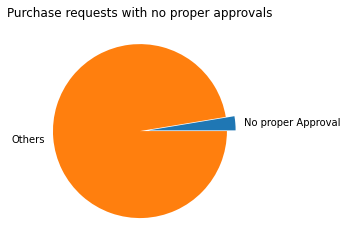

In [151]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([R5_result1.shape[0], (PR_Data.shape[0]-R5_result1.shape[0])])
mylabels = ["No proper Approval", "Others"]
myexplode = [0.1, 0]
plt.pie(y, labels = mylabels, explode = myexplode)
plt.title("Purchase requests with no proper approvals")
plt.show

In [152]:
writer = ExcelWriter(r"/content/drive/My Drive/GoogleColabFolder/CIMA_Training/results.xlsx",datetime_format='dd-mmm-yyyy')
aaa.to_excel(writer,'aaa',index=True)
writer.save()

NameError: ignored

## Apply a machine learning techniques

---